<a href="https://colab.research.google.com/github/andresfelipebarragannino6-ai/Numpy/blob/main/copia_de_untitled13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Cargar datos del club
datos_club = pd.read_csv('datos_club.csv')
datos_club.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [4]:
# Revisar información general
datos_club.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   fecha_partido           100 non-null    object
 1   equipo_local            100 non-null    object
 2   equipo_visitante        100 non-null    object
 3   goles_local             100 non-null    int64 
 4   goles_visitante         100 non-null    int64 
 5   posesion_local (%)      100 non-null    int64 
 6   posesion_visitante (%)  100 non-null    int64 
 7   tiros_arco_local        100 non-null    int64 
 8   tiros_arco_visitante    100 non-null    int64 
 9   estadio                 100 non-null    object
dtypes: int64(6), object(4)
memory usage: 7.9+ KB


In [5]:
# Encontrar y manejar datos faltantes
datos_club.isnull().sum()
datos_club['goles_totales'] = datos_club['goles_local'].fillna(datos_club['goles_local'].mean())
print("Valores nulos antes de imputación")
print(datos_club.isnull().sum())

Valores nulos antes de imputación
fecha_partido             0
equipo_local              0
equipo_visitante          0
goles_local               0
goles_visitante           0
posesion_local (%)        0
posesion_visitante (%)    0
tiros_arco_local          0
tiros_arco_visitante      0
estadio                   0
goles_totales             0
dtype: int64


In [6]:
# One-Hot Enconig para equipos
datos_preparados = pd.get_dummies(datos_club, columns=['equipo_local', 'equipo_visitante']) # La función get_dummies convierte los equipos en columnas binarias
datos_preparados.head()

,fecha_partido,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio,goles_totales,equipo_local_Atlético Python,equipo_local_Cebollitas FC,equipo_local_Data United,equipo_local_NumPy City,equipo_local_Real Pandas,equipo_visitante_Atlético Python,equipo_visitante_Cebollitas FC,equipo_visitante_Data United,equipo_visitante_NumPy City,equipo_visitante_Real Pandas
0,2023-01-01,2,0,54,46,12,6,Python Arena,2,True,False,False,False,False,False,True,False,False,False
1,2023-01-08,1,5,60,40,12,3,Estadio ML,1,False,False,False,True,False,True,False,False,False,False
2,2023-01-15,1,0,55,45,10,7,Python Arena,1,False,True,False,False,False,False,False,True,False,False
3,2023-01-22,2,3,57,43,3,3,Campo Pandas,2,True,False,False,False,False,False,False,True,False,False
4,2023-01-29,5,3,52,48,7,12,Estadio ML,5,False,False,True,False,False,False,True,False,False,False


In [7]:
# Eliminar filas duplicadas
datos_preparados.drop_duplicates(inplace=True)

print(f'Filas antes de eliminar duplicados:',len(datos_preparados))
datos_preparados.drop_duplicates(inplace=True)
print(f'Filas después de eliminar duplicados:',len(datos_preparados))

Filas antes de eliminar duplicados: 100
Filas después de eliminar duplicados: 100


In [8]:
# Manejar Fechas
datos_preparados['fecha_partido'] = pd.to_datetime(datos_preparados['fecha_partido'],errors='coerce')
print("Fechas invalidas (Nat) luego de la conversión")
print(datos_preparados['fecha_partido'].isnull().sum())

Fechas invalidas (Nat) luego de la conversión
0


In [9]:
print(datos_preparados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   fecha_partido                     100 non-null    datetime64[ns]
 1   goles_local                       100 non-null    int64         
 2   goles_visitante                   100 non-null    int64         
 3   posesion_local (%)                100 non-null    int64         
 4   posesion_visitante (%)            100 non-null    int64         
 5   tiros_arco_local                  100 non-null    int64         
 6   tiros_arco_visitante              100 non-null    int64         
 7   estadio                           100 non-null    object        
 8   goles_totales                     100 non-null    int64         
 9   equipo_local_Atlético Python      100 non-null    bool          
 10  equipo_local_Cebollitas FC        100 non-null    b

In [10]:
print("Columnas con valores nulos tras limpieza:")
print(datos_preparados.isnull().sum())

Columnas con valores nulos tras limpieza:
fecha_partido                       0
goles_local                         0
goles_visitante                     0
posesion_local (%)                  0
posesion_visitante (%)              0
tiros_arco_local                    0
tiros_arco_visitante                0
estadio                             0
goles_totales                       0
equipo_local_Atlético Python        0
equipo_local_Cebollitas FC          0
equipo_local_Data United            0
equipo_local_NumPy City             0
equipo_local_Real Pandas            0
equipo_visitante_Atlético Python    0
equipo_visitante_Cebollitas FC      0
equipo_visitante_Data United        0
equipo_visitante_NumPy City         0
equipo_visitante_Real Pandas        0
dtype: int64


In [11]:
print("Vista final del dataset final:")
display(datos_preparados.head())

Vista final del dataset final:


,fecha_partido,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio,goles_totales,equipo_local_Atlético Python,equipo_local_Cebollitas FC,equipo_local_Data United,equipo_local_NumPy City,equipo_local_Real Pandas,equipo_visitante_Atlético Python,equipo_visitante_Cebollitas FC,equipo_visitante_Data United,equipo_visitante_NumPy City,equipo_visitante_Real Pandas
0,2023-01-01,2,0,54,46,12,6,Python Arena,2,True,False,False,False,False,False,True,False,False,False
1,2023-01-08,1,5,60,40,12,3,Estadio ML,1,False,False,False,True,False,True,False,False,False,False
2,2023-01-15,1,0,55,45,10,7,Python Arena,1,False,True,False,False,False,False,False,True,False,False
3,2023-01-22,2,3,57,43,3,3,Campo Pandas,2,True,False,False,False,False,False,False,True,False,False
4,2023-01-29,5,3,52,48,7,12,Estadio ML,5,False,False,True,False,False,False,True,False,False,False


In [12]:
print("Shape final del dataset preparado",datos_preparados.shape)

Shape final del dataset preparado (100, 19)


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos de los partidos
df_partidos = pd.read_csv('partidos_cebollitas.csv')

# Monstrar primeras filas
df_partidos.head(6)

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML
5,2023-02-05,Data United,Cebollitas FC,3,3,60,40,8,11,Python Arena


In [14]:
# Estadisticas descriptivas generales
df_partidos.describe()

,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.63000,2.540000,50.250000,49.750000,7.580000,7.870000
std,1.58691,1.788967,6.035878,6.035878,2.899599,2.966667
min,0.00000,0.000000,40.000000,40.000000,3.000000,3.000000
25%,1.00000,1.000000,45.000000,44.750000,5.000000,5.000000
50%,3.00000,3.000000,51.000000,49.000000,7.500000,8.000000
75%,4.00000,4.000000,55.250000,55.000000,10.000000,11.000000
max,5.00000,5.000000,60.000000,60.000000,12.000000,12.000000


In [15]:
# Promedio de goles cebollitas y visitante
goles_local_cebollitas = df_partidos[df_partidos['equipo_local'] == 'Cebollitas FC']['goles_local'].mean()
goles_visitante_cebollitas = df_partidos[df_partidos['equipo_visitante'] == 'Cebollitas FC']['goles_visitante'].mean()

print('Promedio de goles cebollitas como local:',goles_local_cebollitas)
print('Promedio de goles cebollitas como visitante:',goles_visitante_cebollitas)

Promedio de goles cebollitas como local: 2.230769230769231
Promedio de goles cebollitas como visitante: 2.611111111111111


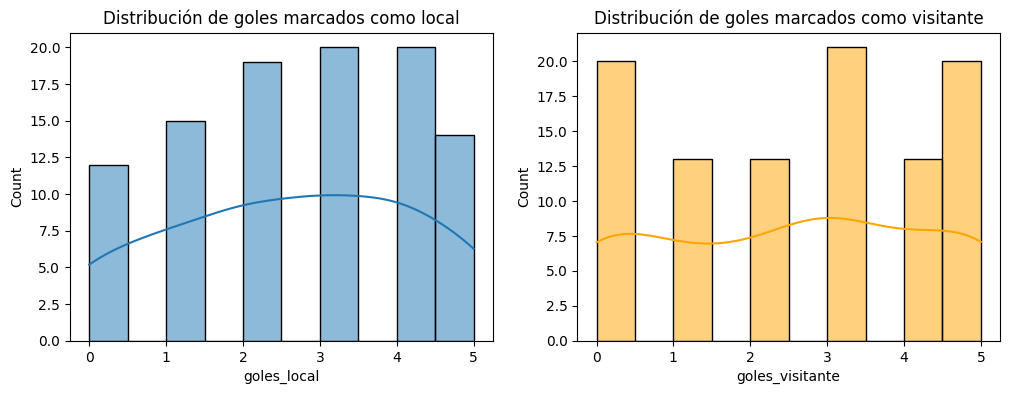

In [16]:
# Histogramas de goles marcados local y visitante
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df_partidos['goles_local'],kde=True,ax=ax[0],bins=10)
ax[0].set_title('Distribución de goles marcados como local')
sns.histplot(df_partidos['goles_visitante'],kde=True,ax=ax[1],bins=10,color='orange')
ax[1].set_title('Distribución de goles marcados como visitante')
plt.show()

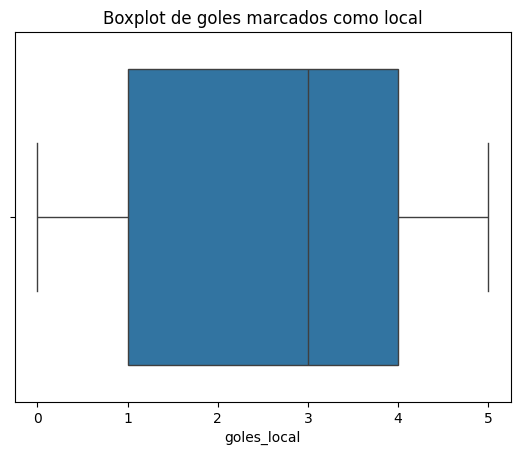

In [17]:
# Boxplot para goles del equipo local
sns.boxplot(x=df_partidos['goles_local'])
plt.title('Boxplot de goles marcados como local')
plt.show()

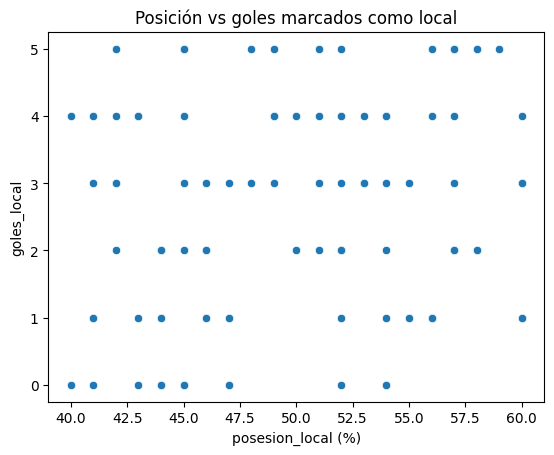

In [18]:
# Scatterplot de posición vs goles marcados (local)
sns.scatterplot(x='posesion_local (%)', y='goles_local', data=df_partidos)
plt.title('Posición vs goles marcados como local')
plt.show()

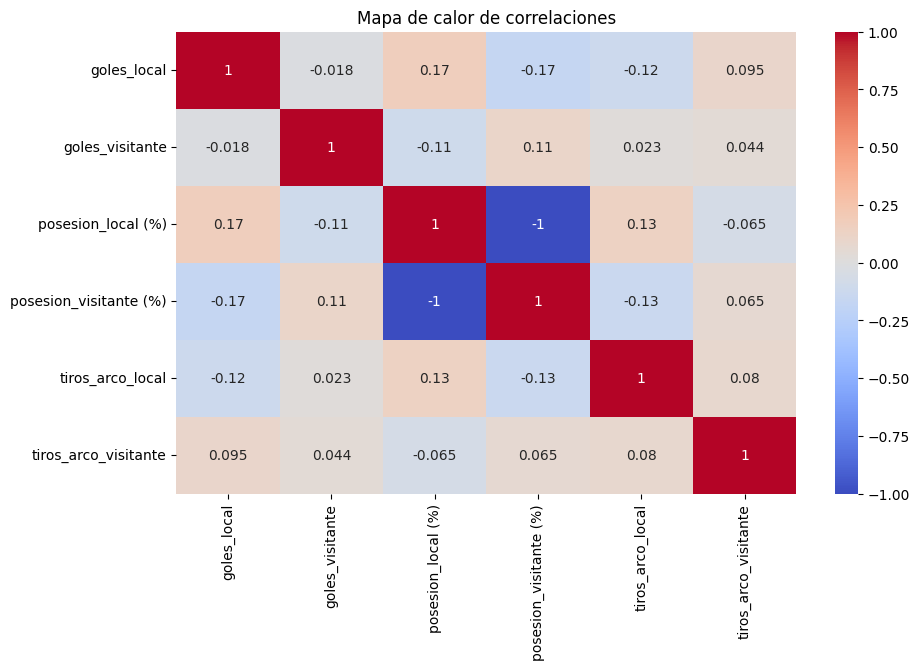

In [19]:
# Mapa de calor de correlaciones entre variables clave
plt.figure(figsize=(10,6))
sns.heatmap(df_partidos[['goles_local','goles_visitante','posesion_local (%)',
                         'posesion_visitante (%)','tiros_arco_local',
                         'tiros_arco_visitante']].corr(),annot=True,cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Cargar datos del partidos
df_partidos = pd.read_csv('partidos_cebollitas.csv')
df_partidos.head(5)

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [21]:
# Apliar Normalización a tiros al arco de aproximadamente entre 8 a 15 tiros
scaler_norm = MinMaxScaler()
df_partidos['tiros_arco_local_norm'] = scaler_norm.fit_transform(df_partidos[['tiros_arco_local']])
df_partidos['tiros_arco_visitante_norm'] = scaler_norm.fit_transform(df_partidos[['tiros_arco_visitante']])
# Ver resultados
print(df_partidos[['tiros_arco_local','tiros_arco_local_norm']].head(6))
print(df_partidos[['tiros_arco_visitante','tiros_arco_visitante_norm']].head(6))

   tiros_arco_local  tiros_arco_local_norm
0                12               1.000000
1                12               1.000000
2                10               0.777778
3                 3               0.000000
4                 7               0.444444
5                 8               0.555556
   tiros_arco_visitante  tiros_arco_visitante_norm
0                     6                   0.333333
1                     3                   0.000000
2                     7                   0.444444
3                     3                   0.000000
4                    12                   1.000000
5                    11                   0.888889


In [22]:
# Aplicar estandarización a la posición (%)
scaler_std = StandardScaler()
df_partidos['posesion_local_std'] = scaler_std.fit_transform(df_partidos[['posesion_local (%)']])
df_partidos['posesion_visitante_std'] = scaler_std.fit_transform(df_partidos[['posesion_visitante (%)']])
# Ver resultados
print(df_partidos[['posesion_local (%)','posesion_local_std']].head())
print(df_partidos[['posesion_visitante (%)','posesion_visitante_std']].head())

   posesion_local (%)  posesion_local_std
0                  54            0.624415
1                  60            1.623479
2                  55            0.790926
3                  57            1.123947
4                  52            0.291394
   posesion_visitante (%)  posesion_visitante_std
0                      46               -0.624415
1                      40               -1.623479
2                      45               -0.790926
3                      43               -1.123947
4                      48               -0.291394


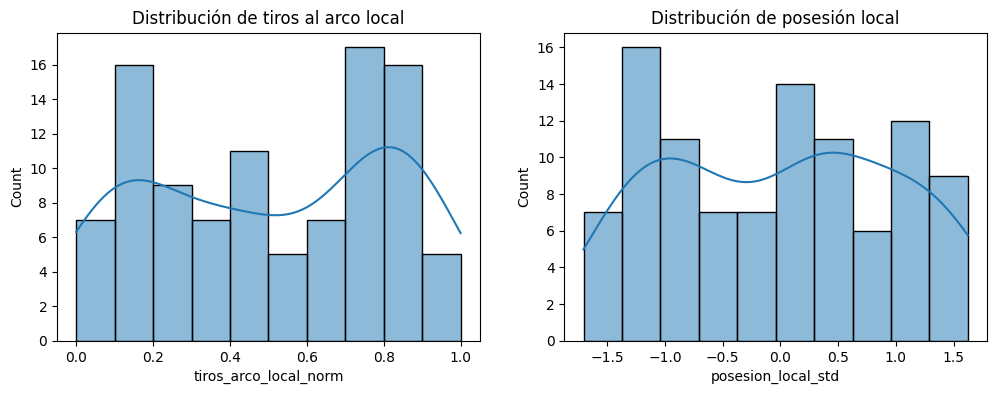

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
# Visualizacion tiros al arco (Normalización)
sns.histplot(df_partidos['tiros_arco_local_norm'],kde=True,ax=ax[0],bins=10)
ax[0].set_title('Distribución de tiros al arco local')
# Visualización posesión local (Normalización)
sns.histplot(df_partidos['posesion_local_std'],kde=True,ax=ax[1],bins=10)
ax[1].set_title('Distribución de posesión local')
plt.show()

In [24]:
import pandas as pd
df_partidos = pd.read_csv('partidos_cebollitas.csv')
df_partidos.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [25]:
# Nueva caracteristica diferencia de goles (local - visitantes)
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']
df_partidos[['goles_local','goles_visitante','diferencia_goles']].head()

,goles_local,goles_visitante,diferencia_goles
0,2,0,2
1,1,5,-4
2,1,0,1
3,2,3,-1
4,5,3,2


In [26]:
# Nueva caracteristica: ratio tiros al arco por porcentaje de posición (local)
df_partidos['ratio_posesion_arco_local'] = df_partidos['tiros_arco_local'] / df_partidos['posesion_local (%)']
df_partidos[['tiros_arco_local','posesion_local (%)','ratio_posesion_arco_local']].head()

,tiros_arco_local,posesion_local (%),ratio_posesion_arco_local
0,12,54,0.222222
1,12,60,0.200000
2,10,55,0.181818
3,3,57,0.052632
4,7,52,0.134615


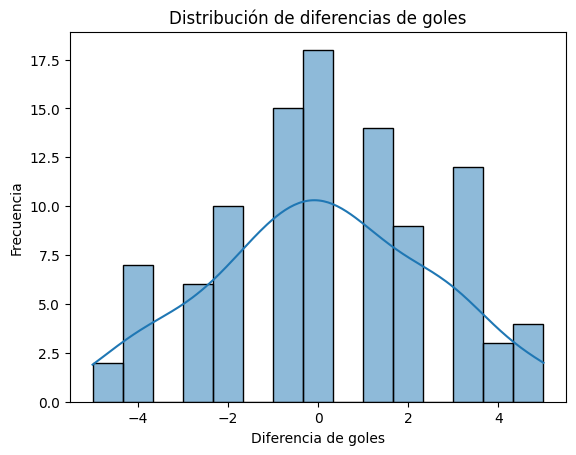

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de diferencias de goles
sns.histplot(df_partidos['diferencia_goles'],kde=True,bins=15)
plt.title('Distribución de diferencias de goles')
plt.xlabel('Diferencia de goles')
plt.ylabel('Frecuencia')
plt.show()

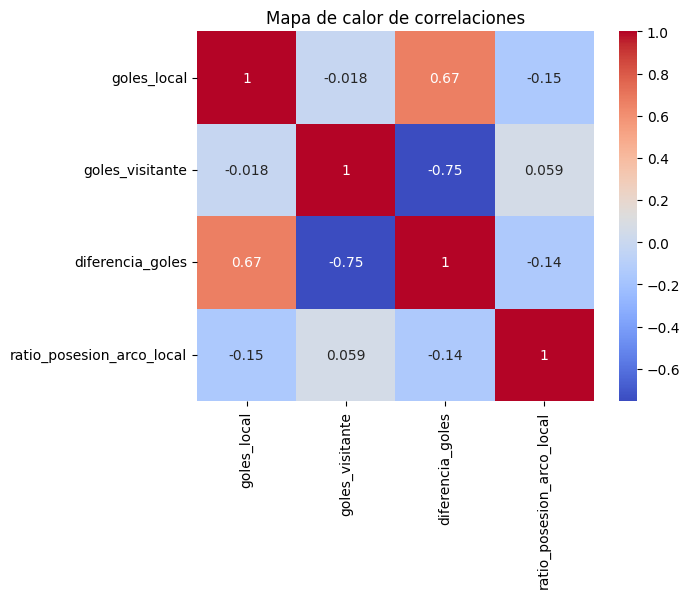

In [28]:
# Análisis de correlaciones
corr_var = ['goles_local','goles_visitante','diferencia_goles','ratio_posesion_arco_local']
corr_matrix = df_partidos[corr_var].corr()

# Mapa de calor
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

In [29]:
import pandas as pd
df_partidos = pd.read_csv('partidos_cebollitas.csv')
# Añadimos claramente variables creadas anteriormente
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']
df_partidos['ratio_posesion_arco_local'] = df_partidos['tiros_arco_local'] / df_partidos['posesion_local (%)']
df_partidos.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio,diferencia_goles,ratio_posesion_arco_local
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena,2,0.222222
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML,-4,0.200000
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena,1,0.181818
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas,-1,0.052632
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML,2,0.134615


In [30]:
from sklearn.feature_selection import SelectKBest, f_regression
# Variables predictoras y objetivo
X = df_partidos[['posesion_local (%)','tiros_arco_local','ratio_posesion_arco_local']]
y = df_partidos['goles_local']
# Seleccionar las 2 mejores variables
selector = SelectKBest(score_func=f_regression,k=2)
selector.fit(X,y)
# Resultados ordenados por relevancia
scores = selector.scores_
variables = X.columns
resultados = pd.DataFrame({'Variable':variables,'Puntuación':scores})
resultados



,Variable,Puntuación
0,posesion_local (%),2.844159
1,tiros_arco_local,1.372691
2,ratio_posesion_arco_local,2.323320


In [31]:
from sklearn.tree import DecisionTreeRegressor
# Entrenar el arbol de decisiones para medir la temperatura
modelo_arbol = DecisionTreeRegressor()
modelo_arbol.fit(X,y)
# Importancia calculada por el modelo
importancia = modelo_arbol.feature_importances_
resultado_importancia = pd.DataFrame({
    'Variable':X.columns,
    'Importancia':importancia
}).sort_values(by='Importancia',ascending=False)
resultado_importancia


,Variable,Importancia
0,posesion_local (%),0.433539
2,ratio_posesion_arco_local,0.368046
1,tiros_arco_local,0.198415


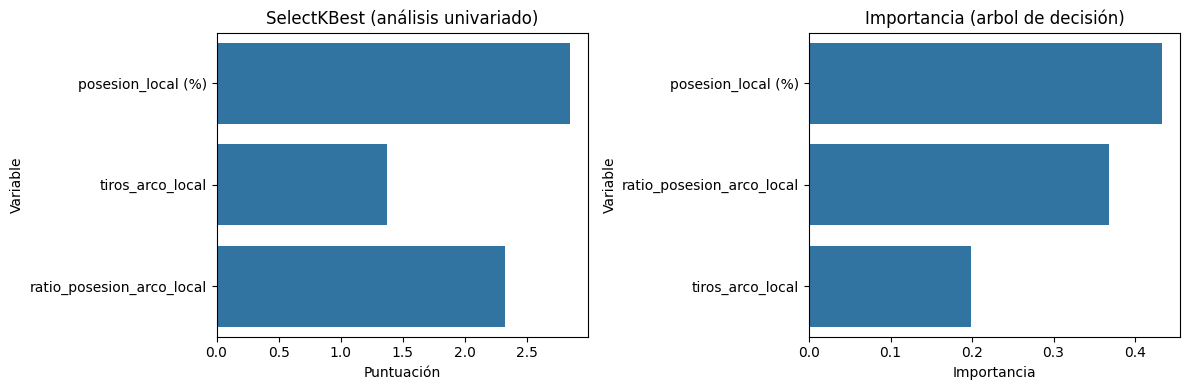

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
# Grafica SelectkBest (análisis univariado)
sns.barplot(x='Puntuación',y='Variable',data=resultados,ax=ax[0])
ax[0].set_title('SelectKBest (análisis univariado)')
# Grafico importancia (arbol de decisión)
sns.barplot(x='Importancia',y='Variable',data=resultado_importancia,ax=ax[1])
ax[1].set_title('Importancia (arbol de decisión)')
plt.tight_layout()
plt.show()

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display

# Cargar datos de partidos
df_partidos = pd.read_csv('partidos_cebollitas.csv')
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']
df_partidos.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio,diferencia_goles
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena,2
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML,-4
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena,1
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas,-1
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML,2


In [34]:
# Slider interactivo para elegir porcentaje de prueba
slider_test_size = widgets.FloatSlider(
    value=0.2,
    min=0.01,
    max=0.5,
    step=0.05,
    description='% Test Set:',
    continuous_update=False
)
display(slider_test_size)

FloatSlider(value=0.2, continuous_update=False, description='% Test Set:', max=0.5, min=0.01, step=0.05)

In [35]:
def dividir_datos(test_size):
    # Dividir datos en conjuntos de entrenamiento y prueba
    X = df_partidos[['posesion_local (%)','tiros_arco_local','goles_local']]
    y = df_partidos['diferencia_goles']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    print(f'Tamaño del conjunto de entrenamiento: {len(X_train)}')
    print(f'Tamaño del conjunto de prueba: {len(X_test)}')
    return X_train, X_test, y_train, y_test

# Usa widget interactivo
widgets.interact(dividir_datos, test_size=slider_test_size)

interactive(children=(FloatSlider(value=0.2, continuous_update=False, description='% Test Set:', max=0.5, min=…

<function __main__.dividir_datos(test_size)>

In [36]:
# División estandar recomendada (80% entrenamientos, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    df_partidos[['posesion_local (%)','tiros_arco_local','goles_local']],
    df_partidos['diferencia_goles'],
    test_size=0.2,
    random_state=42
    )
print("Conjunto de entrenamiento (primeros registros):")
print(X_train.head())
print("\nConjunto de prueba (primeros registros):")
print(X_test.head())

Conjunto de entrenamiento (primeros registros):
    posesion_local (%)  tiros_arco_local  goles_local
55                  51                 6            4
88                  54                 9            0
26                  53                 4            3
42                  52                 4            2
69                  60                 9            1

Conjunto de prueba (primeros registros):
    posesion_local (%)  tiros_arco_local  goles_local
83                  47                 3            3
53                  60                 3            4
70                  50                 5            2
45                  57                 7            5
44                  45                 5            5


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Cargar dataset
df_partidos = pd.read_csv('partidos_cebollitas.csv')
# Crear variable objetivo
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']
# Variables predictoras
X = df_partidos[['posesion_local (%)','tiros_arco_local']]
y = df_partidos['diferencia_goles']
# División estandar: 80% entrenamientos / 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
# Instanciar y entrenar modelo
modelo_rl = LinearRegression()
modelo_rl.fit(X_train,y_train)
print("¡Modelo entrenado exitosamente!")

¡Modelo entrenado exitosamente!


In [39]:
# Monstrar coefientes
print(f'Coeficientes: {modelo_rl.coef_}')
print(f'Intercepto: {modelo_rl.intercept_}')
# Interpretación amigable
for idx, col_name in enumerate(X.columns):
    print(f'Si aumentamos 1 unidad en {col_name}, la diferencia de goles aumenta {modelo_rl.coef_[idx]:.2f}')

Coeficientes: [ 0.05596278 -0.05125811]
Intercepto: -2.5257192572329763
Si aumentamos 1 unidad en posesion_local (%), la diferencia de goles aumenta 0.06
Si aumentamos 1 unidad en tiros_arco_local, la diferencia de goles aumenta -0.05


In [40]:
# Hacer predicciones
y_pred = modelo_rl.predict(X_test)
# Comparar predicciones vs valores reales
df_resultados = X_test.copy()
df_resultados['Diferencia_Goles_Real'] = y_test
df_resultados['Diferencia_Goles_Pred'] = y_pred.round(2)
df_resultados.head(10)

,posesion_local (%),tiros_arco_local,Diferencia_Goles_Real,Diferencia_Goles_Pred
83,47,3,3,-0.05
53,60,3,3,0.68
70,50,5,0,0.02
45,57,7,3,0.31
44,45,5,5,-0.26
39,60,7,3,0.47
22,45,11,0,-0.57
80,49,5,1,-0.04
10,48,5,-2,-0.10
0,54,12,2,-0.12


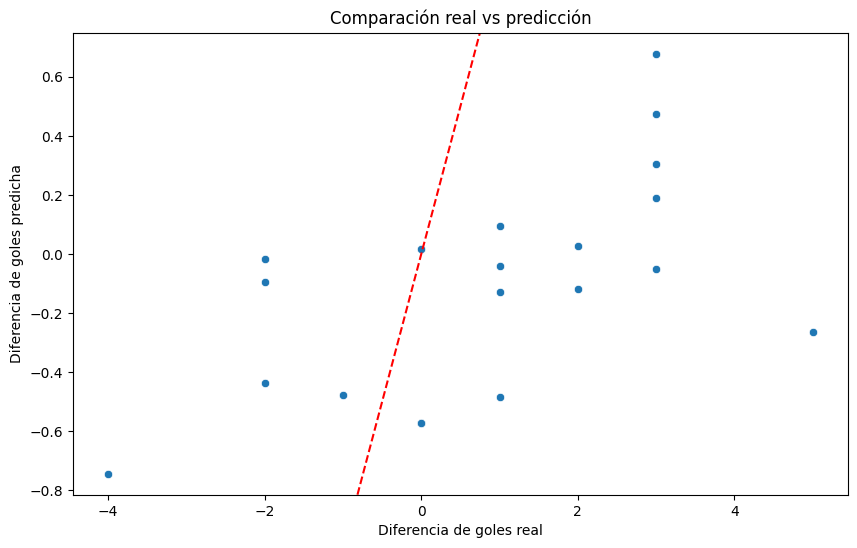

In [41]:
from matplotlib.lines import lineStyles
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión real vs predicción
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Diferencia de goles real')
plt.ylabel('Diferencia de goles predicha')
plt.title('Comparación real vs predicción')
plt.axline((0,0),slope=1,color='red',linestyle='--')
plt.show()

In [42]:
import ipywidgets as widgets
# Widgets de entrada
posesion_input = widgets.FloatSlider(min=30,max=70,step=1,description='Posición local (%)')
tiros_input = widgets.FloatSlider(min=1,max=15,step=1,description='Tiros al Arco')
# Función de predicción
def predecir_diferencia_goles(posesion,tiros):
    # Crear un DataFrame
    entrada = pd.DataFrame({'posesion_local (%)':[posesion],'tiros_arco_local':[tiros]})
    # Realizar predicción
    prediccion = modelo_rl.predict(entrada)[0]
    print(f'La diferencia de goles prevista es de {prediccion:.2f} goles.')
# Mostrar widget interactivo
widgets.interact(predecir_diferencia_goles,posesion=posesion_input,tiros=tiros_input)

interactive(children=(FloatSlider(value=30.0, description='Posición local (%)', max=70.0, min=30.0, step=1.0),…

<function __main__.predecir_diferencia_goles(posesion, tiros)>

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df_partidos = pd.read_csv('partidos_cebollitas.csv')
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']

X = df_partidos[['posesion_local (%)','tiros_arco_local']]
y = df_partidos['diferencia_goles']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_rl = LinearRegression()
modelo_rl.fit(X_train,y_train)

y_pred = modelo_rl.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
# Calcular métricas
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
# Mostrar resultados
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')
print(f'MAE: {mae:.2f}')

MSE: 4.96
RMSE: 2.23
R2: -0.03
MAE: 1.89


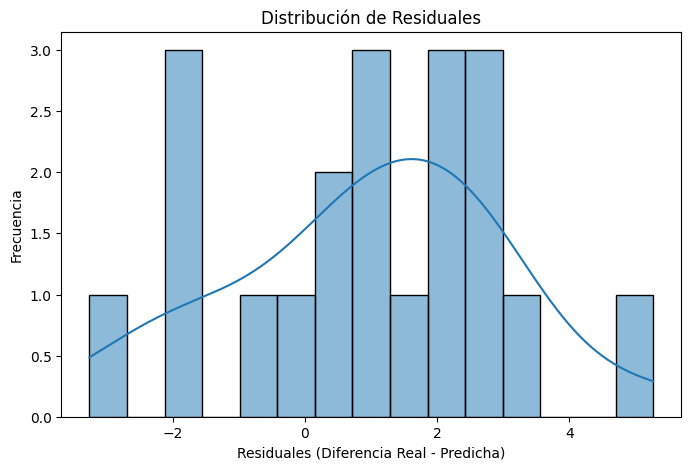

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión real vs predicción
plt.figure(figsize=(8, 5))
sns.histplot(y_test - y_pred, bins=15, kde=True)
plt.title('Distribución de Residuales')
plt.xlabel('Residuales (Diferencia Real - Predicha)')
plt.ylabel('Frecuencia')
plt.show()